In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

In [2]:
diabetes_dataset = pd.read_csv('diabetes.csv')

In [3]:
diabetes_dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<Axes: >

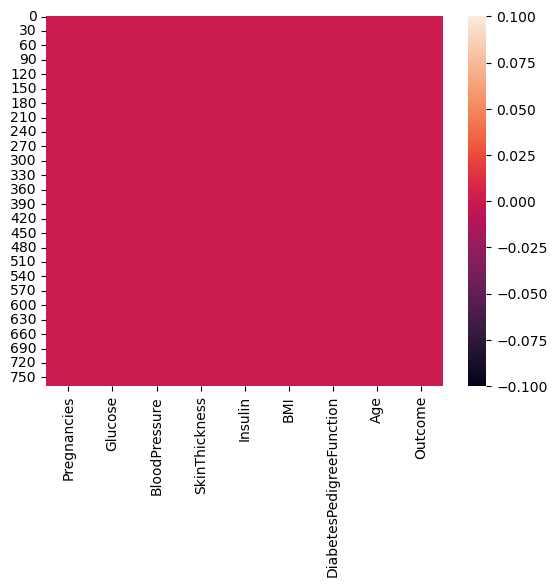

In [4]:
sns.heatmap(diabetes_dataset.isnull())

In [5]:
correlation = diabetes_dataset.corr()
print(correlation)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

<Axes: >

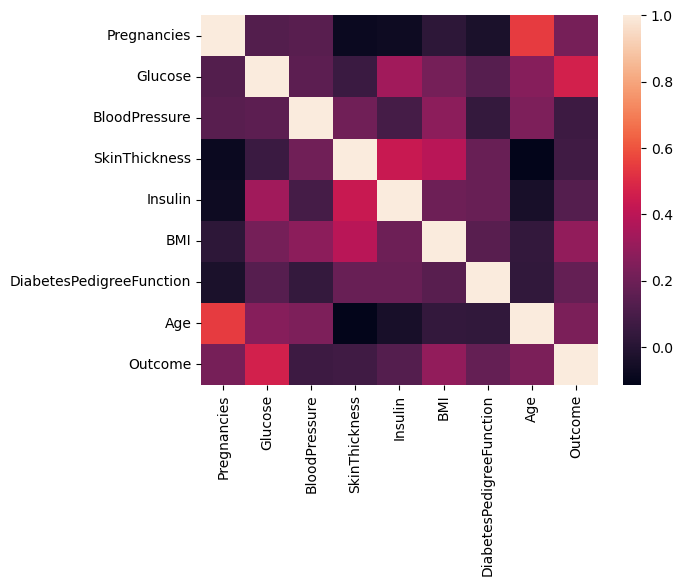

In [6]:
sns.heatmap(correlation)

In [7]:
# Replace zeroes with NaN in important medical features
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
diabetes_dataset[columns_to_replace] = diabetes_dataset[columns_to_replace].replace(0, np.nan)

# Fill NaNs with median values
diabetes_dataset.fillna(diabetes_dataset.median(), inplace=True)

In [8]:
X = diabetes_dataset.drop(columns='Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [9]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47


In [10]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

In [12]:
X_train

array([[-0.84488505, -1.04069197, -0.85920438, ..., -0.76487241,
         0.3265464 , -0.78628618],
       [ 0.3429808 ,  0.14279979,  0.46433873, ..., -0.41556299,
        -0.09929033,  0.57511787],
       [-0.54791859, -0.54757041, -1.19009016, ...,  0.35582865,
        -0.74559573, -0.70119842],
       ...,
       [-0.84488505, -0.81056857, -0.19743282, ...,  0.82157454,
        -0.76673656, -0.27575966],
       [ 1.82781311, -0.35032178, -0.19743282, ..., -0.72120873,
        -0.9992857 ,  0.57511787],
       [ 0.04601433,  0.73454567, -1.19009016, ..., -0.43011755,
        -0.55834837,  0.31985461]])

In [13]:
smote = SMOTE(random_state=42)
X_resampled, Y_resampled = smote.fit_resample(X, Y)

In [14]:
model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
model.fit(X_train, Y_train)


# model = XGBClassifier(n_estimators=300, max_depth=6, learning_rate=0.1, random_state=42)
# model.fit(X_train, Y_train)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)

In [15]:
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

In [16]:
print(test_preds)

[1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0
 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 1 0]


In [17]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_resampled, Y_resampled)
model = grid.best_estimator_

In [18]:
print("Training Accuracy:", accuracy_score(Y_train, train_preds))
print("Testing Accuracy:", accuracy_score(Y_test, test_preds))
print("\nClassification Report:\n", classification_report(Y_test, test_preds))
print("ROC AUC Score:", roc_auc_score(Y_test, model.predict_proba(X_test)[:, 1]))

Training Accuracy: 0.993485342019544
Testing Accuracy: 0.7532467532467533

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.86      0.82       100
           1       0.68      0.56      0.61        54

    accuracy                           0.75       154
   macro avg       0.73      0.71      0.72       154
weighted avg       0.75      0.75      0.75       154

ROC AUC Score: 1.0


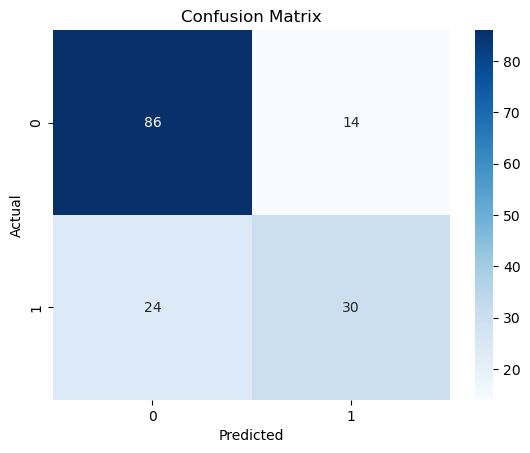

In [19]:
sns.heatmap(confusion_matrix(Y_test, test_preds), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

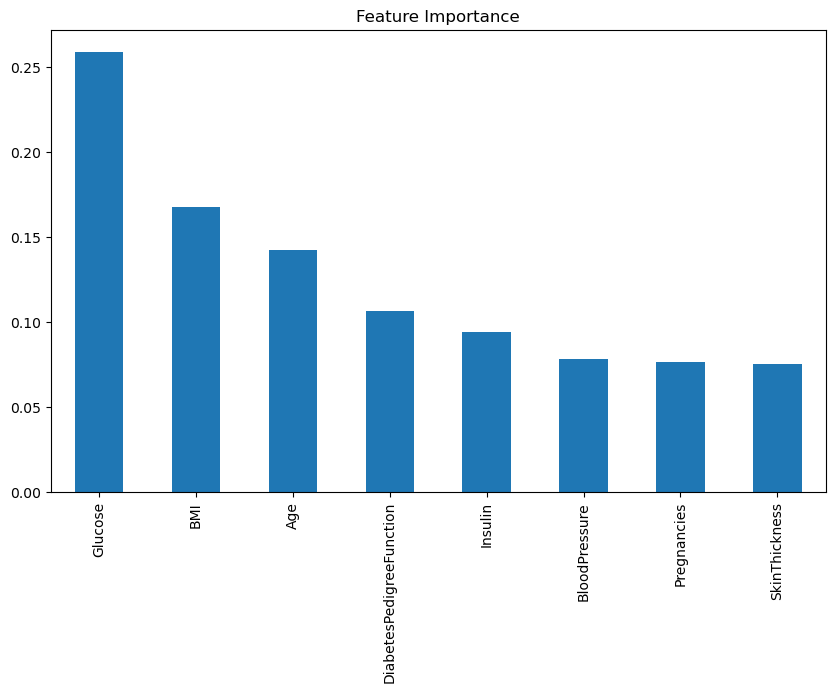

In [20]:
feature_importances = pd.Series(model.feature_importances_, index=diabetes_dataset.columns[:-1])
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10,6))
plt.title("Feature Importance")
plt.show()

In [21]:
def predict_diabetes_risk(input_data):
    input_df = pd.DataFrame([input_data], columns=diabetes_dataset.columns[:-1])
    input_scaled = scaler.transform(input_df)

    prediction = model.predict(input_scaled)[0]
    risk_percent = model.predict_proba(input_scaled)[0][1] * 100

    if prediction == 1:
        print(f"🚨 The person is likely to have diabetes with a confidence of {risk_percent:.2f}%")
    else:
        print(f"✅ The person is not diabetic. However, risk of getting diabetes in the future is {risk_percent:.2f}%")

In [22]:
predict_diabetes_risk([2, 120.0, 70.0, 25.0, 100.0, 28.5, 0.5, 24])

✅ The person is not diabetic. However, risk of getting diabetes in the future is 13.64%
